# Schistosomiasis Vaccine - A Python Notebook

In this notebook we are going to try and reproduce results from this recent [paper]( https://parasitesandvectors.biomedcentral.com/articles/10.1186/s13071-017-2227-0) by *Stylianou et al. (2017)*, which models the effect of a partially efficacious schistosomiasis vaccine.

## Recap:

Recall from last time we produced a model for the mean worm burden M, and density of juvenile worms in the environement:

$$\frac{dM}{d t} = \beta L(t)\,d_1 - (\mu+\mu_1)M(t)$$ 

$$\frac{dL}{d t} = sNd_2\lambda M(t) - (\mu_2 +  \beta N) L(t)$$

where,

* $d_1$ is the death rate of worms in hosts before maturity
* $\mu$ is the death rate of human hosts
* $\mu_1$ is the death rate of adult worms
* $\mu_2$ is the death rate of juvenile worms in the environment
* $\beta$ is the rate of infection
* $s$ is the proportion of female worms in worm population
* $N$ is the size of the human population
* and $\lambda = \lambda(M)$ is the egg output per female worm

By assuming the density of juvenile worms in the environement is close to its local equilibrium, and that the fecundity and worm mating probabilities are density dependent

$$\frac{dM}{d t} =(\mu+\mu_1)(R_0 F(M) - 1)M(t)$$

where $F(M) = f(M)\phi(M,k)$ with $f(M) = \left(1+ M(1-z)/k\right)^{-(k+1)}$ and $\phi(M,k) = 1 - \pi M^{1-k}\left(1 - M/(M+k)\right)^{1+k}$.


## Dynamics without vaccine 

First lets use Python's handy libraries to solve and plot a few trajectories. We'll use numpy, scipy to integrate the ODE, and pyplot for plotting. Importing seaborn improves the appearance of pyplots plots.

In [1]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
# This makes the plots appear inside the notebook
%matplotlib inline

To demonstrate how these functions work, here is a simple example where we are using the libraries to solve the ODE $dy/dx = x - y$.

In [2]:
# This defines a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0  # the initial condition
ys = odeint(dy_dx, y0, xs)  # This function integrates the ODE
ys = np.array(ys).flatten()

z0 = 2.0  # a different initial condition
zs = odeint(dy_dx, z0, xs)  # This function integrates the ODE
zs = np.array(zs).flatten()

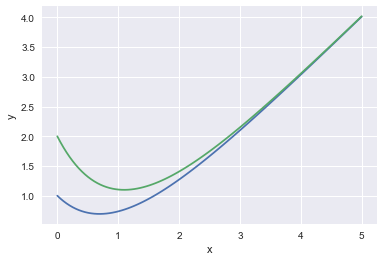

In [3]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys,xs,zs);

<div class="alert alert-block alert-info"><b>Question:</b> Can you plot a few trajectories of solutions to the density dependent model above, given the following set of parameters? Can you find (roughly) the critical worm burden under which the worm population dies out?</div>

N.B. in Python to raise to the power use ** 

In [4]:
k = 0.24        # negative binomial aggregation parameter
mu = 1.0/50.0   # human per capita death rate per year
gamma = 0.0007  # density dependent fecundity parameter
beta = 0.63     # rate of contact between human and infective stages
mu1 = 1.0/4.0 # parasite mortality rate
r0 = 3.0  

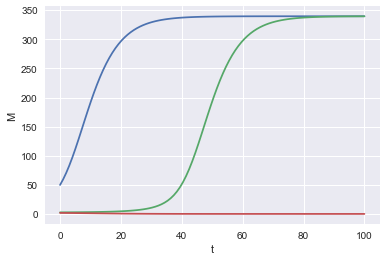

In [5]:
# DEFINE A FUNCTION THAT CALCULATES THE DERIVATIVE

def f(m):
    return (1.0 + m*(1.0-np.exp(-1.0*gamma))/k)**(-k-1.0)

def phi(m):
    return  1.0 - (1.0-(m/(m+k))**(1.0+k))*(np.pi * m**0.75)

def dm_dt(m,t):
    # YOUR CODE HERE
    return (mu+mu1)*(r0*phi(m)*f(m) - 1.0)*m


# SOLVE THE ODE WITH DIFFERENT INITIAL CONDITIONS AND PLOT THE RESULTS

ts = np.linspace(0,100,100)
m0 = 50.0  # the initial condition
ms1 = odeint(dm_dt, m0,ts)
ms1 = np.array(ms1).flatten()

m0 = 3.0  # the initial condition
ms2 = odeint(dm_dt, m0,ts)
ms2 = np.array(ms2).flatten()

m0 = 2.0  # the initial condition
ms3 = odeint(dm_dt, m0,ts)
ms3 = np.array(ms3).flatten()

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("t")
plt.ylabel("M")
plt.plot(ts, ms1,ts,ms2,ts,ms3);

# Great, now lets consider how a vaccine will work

A vaccine for schistosomiasis has the potential to work in 3 different ways.

1. It could increase the per capital mortility rate of the adult worms $\sigma$.

2. It may decrease the number of eggs produced by female worms $\lambda$.

3. It could decrease the rate at which juvenile worms are able to infect hosts $\beta$.

Lets denote the efficacy of tha vaccine of doing these three things $\nu_1$, $\nu_2$ and $\nu_3\in[0,1]$, so that once a vaccine has been administered the rates $\sigma$, $\lambda$ and $\beta$ become

$$\sigma' = \left(\dfrac{1}{1-\nu_1}\right)\sigma$$

$$\lambda' = (1-\nu_2)\,\lambda$$

$$\beta' = (1-\nu_3)\,\beta$$

Individuals in the population will either be vaccinated, or not vaccinated. Lets denote the number of people in the vaccinated population $N_v$ and the number in the non-vaccinated group $N_u$, so that $N_u +N_v = N$.

Lets now suppose that we vaccinate non-vaccinated people with per capita rate $q$ per year.
The protection from a vaccine will eventually wear off, so lets say that immunity is lost with rate $\omega$. Therefore

$$\dfrac{dN_u}{dt} = -qN_u + \omega N_v -\mu N_u $$

$$\dfrac{dN_v}{dt} = qN_u - \omega N_v - \mu N_v$$

With the initial conditions,$N_v(0) = p$, $N_u(0) = 1 - p$, can you solve the system?


In their paper, Stylianou et al looked at two vaccination frameworks.

#### 1. Vaccination of a proportion p of infants

$q=0$, $N_v(0) = p>0$

#### 2. Vaccination of the general public at a per capita rate q

$p=0$, $q>0$


## Model without density dependence

We are following the Stylianou [paper]( https://parasitesandvectors.biomedcentral.com/articles/10.1186/s13071-017-2227-0), so lets go along with their model and terminology. This means $\mu_1\rightarrow\sigma$, $sNd_2\rightarrow\psi$ and $\beta N$ is now small enough to ignore.

The dynamics of the worm burden within the unvaccinated and unvaccinated groups, and size of the environmental reservoir of worms are given by

$$\frac{dM_u}{d t} = \beta_u L(t) - (\mu+\sigma)M_u(t) - qM_u(t)+\omega M_v(t)$$

$$\frac{dM_u}{d t} = \beta_v L(t) - (\mu+\sigma')M_u(t) + qM_v(t)-\omega M_u(t)$$

$$\frac{dL}{d t} = \psi\left(\lambda M_u(t)+\lambda'M_v(t)\right) - 
\mu_2 L(t)$$

where $\beta_u = \int\limits_{t=0}^{\infty}\beta N_u(t)\, dt=\dfrac{\beta(\mu+\omega-p\mu)}{\mu(\omega+q+\mu)}$ is the average contact of the unvaccinated population

and $\beta_v = \int\limits_{t=0}^{\infty}\beta' N_v(t)\, dt=\dfrac{\beta'(q+p\mu)}{\mu(\omega+q+\mu)}$ is the average contact of the vaccinated population

## Effective reproduction number

Recall from the first lecture that $R_0$, which is the number of female offspring produced per female worm that survives to reproductive immunity, determines the long term behaviour of the model without density dependence (and vaccination) and is given by

$$R_0 = \dfrac{\psi\lambda\beta}{\mu_2(\mu+\sigma)}$$.


<div class="alert alert-block alert-info"><b>Questions:</b><br/>

We will now see how the vaccination model affects this.<br/><br/>

1. If we put $n$ worms into the environment, how many will establish? And what proportion go into the vaccinated/unvaccinated popuation?<br/><br/>

2. Now we're going to consider the eggs produced worms during their life time, which depends on the vaccination status of the hosts. During their lifetime, the number of worms status of host will be given by the equation<br/>
<br/>
$$\frac{d}{d t}\left(\begin{array}{c}M_u\\M_v\end{array} \right) = \begin{pmatrix} -\mu_u & \omega \\ q & -\mu_v \end{pmatrix}\left(\begin{array}{c}M_u\\M_v\end{array} \right) = \boldsymbol{M}\left(\begin{array}{c}M_u\\M_v\end{array} \right)$$<br/>

where $\mu_u = (\mu+\sigma+q)$, $\mu_v =(\mu+\sigma'+\omega)$.
Find the eigenvalues and eigenvectors of $\textbf{M}$ and express it using its eigen-decomposition.<br/><br/>

3. If the egg production of a female worm during its two states is $\Lambda = (\lambda_u,\lambda_v)$, the contribution off eggs from an infected worm durings its life, Q, will be<br/><br/>

$$ Q = \psi\int\limits_{t=0}^{\infty}\Lambda\cdot\left(\begin{array}{c}M_u\\M_v\end{array} \right)(t)\,dt$$<br/><br/>

Show that $$Q = -\psi\Lambda \boldsymbol{M}^{-1}\Pi$$<br/><br/>

where $\Pi$ are the initial conditions of $(M_u,M_v)$, and hence show<br/><br/>

$$R_e = -\frac{\psi}{\mu_2}\lambda\boldsymbol{M}^{-1}\boldsymbol{b}$$

where $\boldsymbol{b}=(\beta_u,\beta_v)$

</div>

## Model with density dependence

As in the previous lecture, we'll now consider the effect of the density dependent fecundity, and mating probabilities when the underlying distribution of worms is a negative-binomial with mean $M$ and aggregation $k$.

This means that female worm fecundity is replaced by $\lambda\rightarrow\lambda F(M)$, with $F(M) = f(M)\,\phi(M,k)$ where

$$f(M) = \left(1+ M(1-z)/k\right)^{-(k+1)}$$

$$\phi(M,k) = 1 - \pi M^{1-k}\left(1 - M/(M+k)\right)^{1+k}$$

Because the timescales determining dynamics of worms in the environment are a lot smaller than those of adult worms, we can set $L$ to be at its local equilibrium.

$$L(t) = \psi\left(\lambda F(M_u) M_u(t) + \lambda'F(M_v)M_v\right)/\mu_2$$

which we sub into

$$\frac{dM_u}{d t} = \beta_u L(t) - (\mu+\sigma)M_u(t) - qM_u(t)+\omega M_v(t)$$

$$\frac{dM_v}{d t} = \beta_v L(t) - (\mu+\sigma')M_v(t) + qM_v(t)-\omega M_u(t)$$

In this workbook we are just going to focus on **Strategy 1**, vaccinating infants ($q=0$, $p\in[0,1]$). These are the model parameters which have been found from emperical data
 

In [6]:
mu = 1.0/50.0         
sigma = 1.0/4.0
mu2 = 365.0/7.0
lamb = 0.14
beta = 0.63
k = 0.24
gamma = 0.0006

We get to choose R0, which sets the parameter $\psi$.

In [7]:
R0 = 3.0
psi = R0*mu2*(mu+sigma)/(lamb*beta)  

Here we define the parameters that set the vaccine performance:

In [8]:
omega = 0.0     # rate that vaccine wears off, average protection duration is 1/omega
p = 0.8        # proportion of people receiving vaccination at birth
q = 0.0         # rate of general public being vaccinated 

n1 = 0.0        # vaccine death rate efficacy 
n2 = 0.0        # vaccine anti-fecundity efficacy
n3 = 0.9        # vaccine infection protection efficacy

sigma2 = sigma * 1.0/(1.0-n1)
lamb2 = lamb*(1-n2)
beta2 = beta*(1.0-n3)

beta_u = beta*(mu+omega-p*mu)/((omega+q+mu))
beta_v = beta2*(q+p*mu)/((omega+q+mu))

<div class="alert alert-block alert-info"><b>Question:</b><br/> 
    Can you plot a trajectories of the overall mean prevalence $M$?
</div>
[Hint: $M = \left(1-p\right)M_u + pM_v$]

In [9]:
#Here are the density dependent function all set up 

def f(m):
    return (1.0 + m*(1.0-np.exp(-1.0*gamma))/k)**(-k-1.0)

def phi(m):
    return 1.0- 2.0*np.pi*m*(1.0 - m/(m+k))**(1.0+k)

def phi(m):
    return  1.0 - (1.0-(m/(m+k))**(1.0+k))*(np.pi * m**0.75)

# YOUR CODE HERE

def derivative(M, t, r0,p,omega):
    
    beta_u = beta*(mu+omega-p*mu)/(omega+q+mu)
    beta_v = beta2*(q+p*mu)/(omega+q+mu)
    psi = r0*mu2*(mu+sigma)/(lamb*beta)  
    M_u, M_v = M
    L = psi*(lamb*f(M_u)*phi(M_u)*M_u + lamb2*f(M_v)*phi(M_v)*M_v )/mu2
    dMdt = [beta_u*L - (mu+sigma)*M_u - q*M_u + omega*M_v, beta_v*L - (mu+sigma2)*M_v + q*M_u - omega*M_v]
    return dMdt

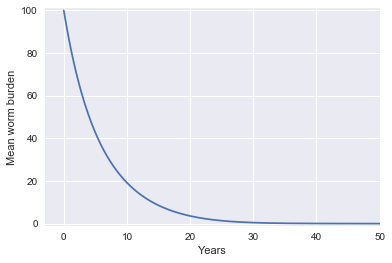

In [10]:
M0 = [100.0,100.0]
t = np.linspace(0, 100, 1000)
sol = odeint(derivative, M0, t,args=(3.0,p,0.0))
m = (1.0-p)*sol[:, 0] + p*sol[:, 1]

plt.plot(t,m)
plt.ylim((-1,101))
plt.xlim((-3,50))
plt.xlabel('Years')
plt.ylabel('Mean worm burden')

If you experiment a bit with varying the proportion of infants vaccinated, you will find that for low levels of vaccine coverage $p$, M will reach a lower equilibrium mean worm burden $M^*>0$, and for higher levels of coverage the mean worm burden decays to zero. This suggests that there will be a critical level of coverage $p_c$ that above which, the disease is eliminated.

<div class="alert alert-block alert-info"><b>Question:</b><br/> 
    Write some code that finds this critical level of coverage for a given basic reproduction number $R_0$, and plot $R_0$ against $p_c$.
</div>

In [11]:
def find_critical_p(r0):
    # YOUR CODE HERE
    end = 100
    p = 0.0
    while ((end > 0.001)&(p<1)):
        p+=0.01
        sol = odeint(derivative, M0, t,args=(r0,p,0.00))
        m = (1.0-p)*sol[:, 0] + p*sol[:, 1]
        end = m[-1]
    return p
        

/Users/Ben/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars


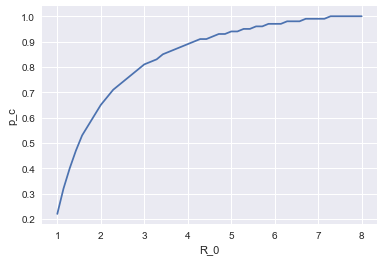

In [12]:
rs = np.linspace(1, 8, 50)
ps = [find_critical_p(r) for r in rs]
plt.plot(rs,ps)
plt.xlabel('R_0')
plt.ylabel('p_c')

<div class="alert alert-block alert-info"><b>Question:</b><br/> 
   Real vaccines do not give a life-long protection, can you find the critical coverage as both a function of $R_0$ and $\omega$?, and plot this as a surface?
</div>

Hint: here is an example some python code that produces a 3D  surface plot

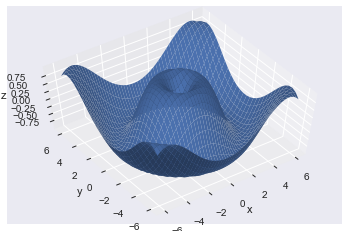

In [13]:
from mpl_toolkits import mplot3d

def g(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

xs = np.linspace(-6, 6, 50)
ys = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(xs, ys)
Z = [[g(x,y) for x in xs] for y in ys]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, lw=0.5, rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(60, 235)

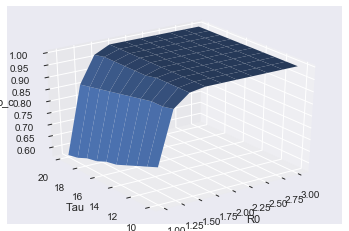

In [14]:
rs = np.linspace(1, 3, 10)
taus = np.linspace(10,20,10)   # Duration of vaccine tau = 1/omega

def find_critical_p(r0,w):
    # YOUR CODE HERE
    end = 100
    p = 0.0
    while ((end > 0.001)&(p<1.0)):
        p+=0.01
        sol = odeint(derivative, M0, t,args=(r0,p,w))
        m = (1.0-p)*sol[:, 0] + p*sol[:, 1]
        end = m[-1]
    return p
        
Rs, Taus = np.meshgrid(rs, taus)
Ps = [[find_critical_p(r,1.0/tau) for r in rs] for tau in taus]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Rs, Taus, Ps, lw=0.5, rstride=1, cstride=1)
ax.view_init(30, 235)
ax.set_xlabel('R0')
ax.set_ylabel('Tau')
ax.set_zlabel('p_c');